In [1]:
import pandas as pd
# import matplotlib_inline as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os

#調色板風格，其顏色較柔和
sns.set_palette('pastel')

#圖表背景的風格，灰階有格線
# sns.set_style('whitegrid')
sns.set_style('darkgrid')


In [6]:
EDA_pt = pd.read_csv('C:/Users/terra/BDSE29_learning data/期末專題/3.期末/3.探索性資料分析/JFK_17.csv')
EDA_pt

C:\Users\terra\AppData\Local\Temp\ipykernel_20180\3789532013.py:1: DtypeWarning: Columns (58) have mixed types. Specify dtype option on import or set low_memory=False.
  EDA_pt = pd.read_csv('C:/Users/terra/BDSE29_learning data/期末專題/3.期末/3.探索性資料分析/JFK_17.csv')


,airline_code,flight_num,tail_num,depa_airport,dest_airport,depa_year,depa_month,depa_date,sche_depa_hr,sche_depa_min,...,visibility,n_number,mfr_mdl_code,model,mfr_co,mfr_year,aircraft_type,eng_type,eng_no,seats_no
0,HA,51,360HA,JFK,HNL,2017,1,1,10,0,...,9.970,360HA,3940018,A330-243,AIRBUS,2016,5.0,5.0,2.0,377.0
1,HA,51,383HA,JFK,HNL,2017,1,2,10,0,...,9.970,383HA,3940018,A330-243,AIRBUS,2011,5.0,5.0,2.0,377.0
2,HA,51,375HA,JFK,HNL,2017,1,3,10,0,...,2.245,375HA,3940018,A330-243,AIRBUS,2015,5.0,5.0,2.0,377.0
3,HA,51,373HA,JFK,HNL,2017,1,4,10,0,...,9.500,373HA,3940018,A330-243,AIRBUS,2014,5.0,5.0,2.0,377.0
4,HA,51,370HA,JFK,HNL,2017,1,5,10,0,...,10.000,370HA,3940018,A330-243,AIRBUS,2014,5.0,5.0,2.0,377.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102073,VX,1399,852VA,JFK,LAX,2017,12,31,7,0,...,10.000,852VA,3940006,A320-214,AIRBUS,2012,5.0,5.0,2.0,182.0
102074,VX,1407,846VA,JFK,LAX,2017,12,31,9,15,...,10.000,846VA,3940006,A320-214,AIRBUS,2011,5.0,5.0,2.0,182.0
102075,VX,1409,642VA,JFK,LAX,2017,12,31,11,30,...,10.000,642VA,3940006,A320-214,AIRBUS,2008,5.0,5.0,2.0,182.0
102076,VX,1411,633VA,JFK,LAX,2017,12,31,13,0,...,10.000,633VA,3940006,A320-214,AIRBUS,2007,5.0,5.0,2.0,182.0


In [7]:
EDA_pt.isna().sum()

airline_code         0
flight_num           0
tail_num             0
depa_airport         0
dest_airport         0
                 ...  
mfr_year         14319
aircraft_type    14319
eng_type         14319
eng_no           14319
seats_no         14319
Length: 66, dtype: int64

In [82]:
## 取得出勤航班
#篩掉取消航班，留下真的有飛的航班
# EDA_pt_act=EDA_pt[EDA_pt['actu_depa_hr'] + EDA_pt['actu_depa_min']  +  EDA_pt['actu_duration'] != 0]
EDA_pt_act=EDA_pt[EDA_pt['sche_duration'] + EDA_pt['delay_total_time'] != 0]
EDA_pt_act.shape

(99984, 66)

In [83]:
## 取得出勤航班數
# 以航班分組，檢視每條航班實際出勤數
total_flights = EDA_pt_act.groupby('flight_num').count()[['tail_num']]
total_flights=total_flights.reset_index(drop=False)
total_flights

,flight_num,tail_num
0,1,707
1,2,284
2,3,549
3,7,362
4,9,325
...,...,...
683,2971,12
684,2975,45
685,2981,2
686,2989,1


In [84]:
## 取得delay航班數
#先篩選出有delay的出勤航班 再以航班分組
# delay_counts = EDA_pt_act.groupby('flight_num')
delay_counts = EDA_pt_act[EDA_pt_act['delay_total_time']>0].groupby('flight_num').count()[['tail_num']]
delay_counts =delay_counts.reset_index(drop=False)
delay_counts

,flight_num,tail_num
0,1,295
1,2,90
2,3,154
3,7,111
4,9,93
...,...,...
632,2966,15
633,2971,2
634,2975,16
635,2989,1


In [85]:
##整理航班 誤點情形
# 有些航班是完美航班 ，都沒有誤點情形，所以經過上一步的篩選，會從航班名單中刪掉，要再把他們加回來，並補上次數為 0
total_delay_counts =pd.merge(
    total_flights,
    delay_counts,
    left_on= 'flight_num' ,
    right_on= 'flight_num' ,
    how= 'left',
    suffixes=('_total_flights','_delay_flights')
)

total_delay_counts['tail_num_delay_flights'] = total_delay_counts['tail_num_delay_flights'].fillna(0)
total_delay_counts

,flight_num,tail_num_total_flights,tail_num_delay_flights
0,1,707,295.0
1,2,284,90.0
2,3,549,154.0
3,7,362,111.0
4,9,325,93.0
...,...,...,...
683,2971,12,2.0
684,2975,45,16.0
685,2981,2,0.0
686,2989,1,1.0


In [86]:
## 計算誤點率
#計算每條航班的誤點率 該航班誤點數 / 該航班出勤數 並把誤點率從高至低排序
total_delay_counts['delay_rates'] = total_delay_counts['tail_num_delay_flights'] / total_delay_counts['tail_num_total_flights']
# delay_rates=delay_rates.reset_index(drop=False)
# delay_rates= delay_rates.rename(columns={'tail_num':'delay_rates'})
total_delay_counts = total_delay_counts.sort_values(by= 'delay_rates',ascending=False)
total_delay_counts

,flight_num,tail_num_total_flights,tail_num_delay_flights,delay_rates
253,934,1,1.0,1.0
117,402,1,1.0,1.0
565,2633,1,1.0,1.0
564,2630,6,6.0,1.0
284,1139,3,3.0,1.0
...,...,...,...,...
445,2110,1,0.0,0.0
654,2896,8,0.0,0.0
576,2725,1,0.0,0.0
434,2082,1,0.0,0.0


In [87]:
total_delay_counts.describe().T

,count,mean,std,min,25%,50%,75%,max
flight_num,688.0,1493.062500,988.205643,1.0,460.75,1493.000000,2389.750000,2998.0
tail_num_total_flights,688.0,145.325581,164.300471,1.0,12.00,78.000000,268.000000,892.0
tail_num_delay_flights,688.0,55.095930,68.772050,0.0,4.00,24.500000,89.250000,477.0
delay_rates,688.0,0.376000,0.212843,0.0,0.25,0.359175,0.485431,1.0


In [88]:
## 把離群直排除 來畫圖
# 可以發現有些航班 的誤點率為100% 若只取前20名畫圖 則完全沒意義
total_delay_counts[total_delay_counts['delay_rates']<1].iloc[0:20,[0,3]]

,flight_num,delay_rates
110,381,0.875000
365,1635,0.833333
579,2784,0.800000
69,212,0.750000
408,2013,0.750000
442,2097,0.750000
553,2581,0.750000
306,1275,0.750000
500,2322,0.750000
403,2006,0.714286


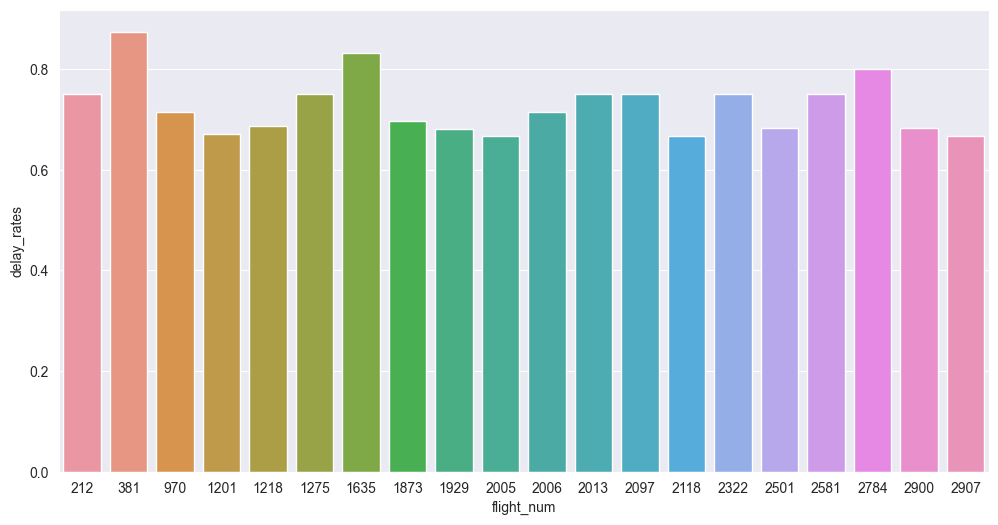

In [90]:
## 繪圖
#以seaborn 劃出長條圖 
#palette="Blues" 可以設定為同一顏色 並漸層 
#不設定顏色 套件會自動選色 一人一色
plt.figure(figsize=(12, 6))
sns.barplot(data = total_delay_counts[total_delay_counts['delay_rates']<1].iloc[0:20,[0,3]], x="flight_num" , y="delay_rates")
# , palette="Blues"

#将画布保存为'xiang.png'，还可以保存为jpg、svg格式图片
plt.savefig('Top20 最會delay 的航班.png')

In [2]:
Tableau_test=total_delay_counts[total_delay_counts['delay_rates']<1].iloc[0:20,[0,3]]

Tableau_test.to_csv('Tableau_test.csv')

NameError: name 'total_delay_counts' is not defined